<a href="https://colab.research.google.com/github/Hectorsyj/prueba/blob/main/Analisis_de_noticias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Actividad Clasificacion de las Noticias

---
Cargar el archivo Noticias.xlsx que contiene las noticias.
Explorar la distribución de la columna Etiqueta para ver cuántas noticias pertenecen a cada categoría.
Visualizar esta distribución mediante gráficos para identificar las categorías más frecuentes.

In [4]:
pip install pandas numpy scikit-learn nltk gensim scipy openpyxl


#Ejercicio 1.

#Carga y Exploración de Datos

**Objetivo:** Familiarizarse con el conjunto de datos y comprender la distribución de las categorías.  
**Acciones:**
* Cargar el archivo Noticias.xlsx que contiene las noticias.
* Explorar la distribución de la columna Etiqueta para ver cuántas noticias pertenecen a cada categoría.
* Visualizar esta distribución mediante gráficos para identificar las categorías más frecuentes.

In [5]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [6]:
# Importar las bibliotecas necesarias
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

# Cargar el archivo de datos
# file_path = '../../Datos/Datos Crudos/Noticias.xlsx'
file_path = 'Noticias.xlsx'
data = pd.read_excel(file_path)

# Mostrar una vista previa de los datos
data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Columna1,Enlaces,Título,info,contenido,Etiqueta
0,0,https://www.eltiempo.com/agresion-contra-un-op...,Operador de grúa quedó inconsciente tras agres...,El conductor de una moto le lanzó el casco y p...,Las autoridades están buscando al conductor de...,colombia
1,1,https://www.eltiempo.com/archivo/documento/CMS...,"Usaquén, primera en infracciones por mal parqueo",La localidad ocupa el primer lugar en comparen...,"""Los andenes son para los peatones"", reclama e...",archivo
2,2,https://www.eltiempo.com/archivo/documento/CMS...,'Me atracaron y vi un arma que me heló la sang...,Un ciudadano relata cómo cuatro hombres lo rob...,A las 7 de la noche me había quedado de encont...,archivo
3,3,https://www.eltiempo.com/archivo/documento/CMS...,"Escoltas mal estacionados, dolor de cabeza de ...",Las zonas de restaurantes se convierten en par...,Atravesados. Eso es lo que se les pasa por la ...,archivo
4,4,https://www.eltiempo.com/archivo/documento/CMS...,Radicado primer proyecto que autorizaría union...,"El representante de 'la U', Miguel Gómez, dijo...",“Estamos proponiendo la figura de un contrato ...,archivo


## Analisis exploratorio

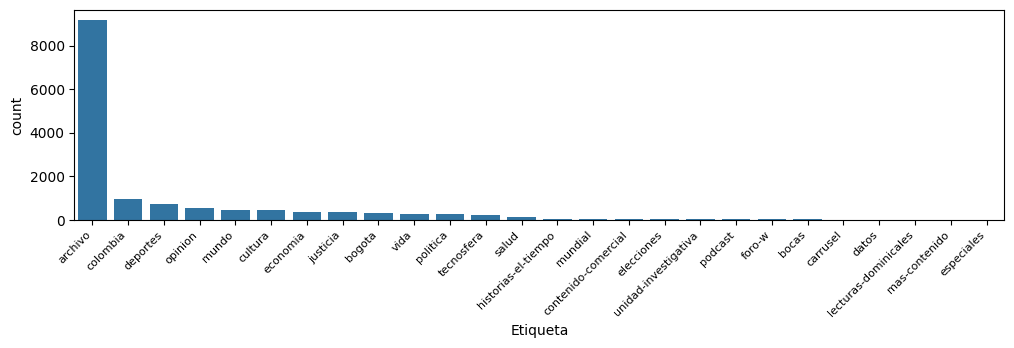

No tendremos en cuenta la etiqueta de archivo ya que esta no tiene significancia


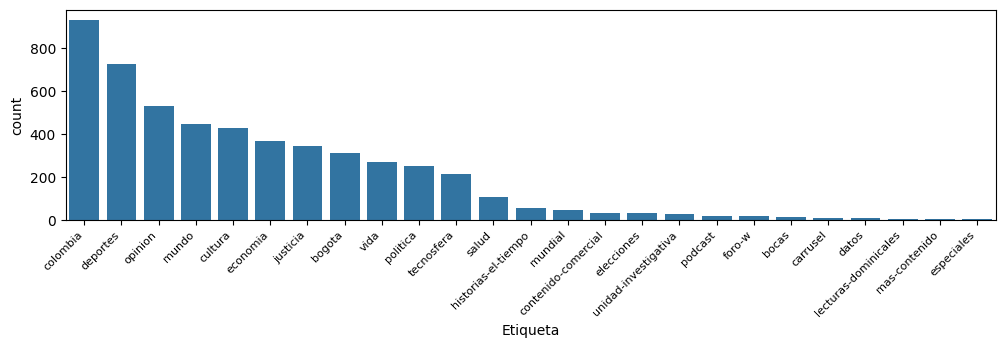

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
category_counts = data['Etiqueta'].value_counts().index.tolist()
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
sns.countplot(x='Etiqueta', data=data, order=category_counts)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()

print('No tendremos en cuenta la etiqueta de archivo ya que esta no tiene significancia')

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 2)
data1= data[data['Etiqueta'] != 'archivo']
category_counts = data1['Etiqueta'].value_counts().index.tolist()
sns.countplot(x='Etiqueta', data=data1, order=category_counts)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()

Al realizar el ejercicio 1. Carga y Exploración de Datos se encontró lo siguiente:

1. **Familiarización con los datos:** El primer paso consistió en cargar el conjunto de datos y visualizar una muestra inicial para entender su estructura y contenido. Este proceso permitió identificar las columnas clave para el análisis, destacándose la columna Etiqueta, que clasifica las noticias en distintas categorías. El propósito de este paso fue garantizar que el archivo estuviera bien estructurado y que los datos fueran adecuados para los análisis posteriores.

2. **Exploración de la distribución de etiquetas (con "archivo"):** Se generó un gráfico que mostró cómo se distribuyen las noticias entre las categorías. El análisis inicial incluyó la etiqueta "archivo", que demostró ser dominante en el conjunto de datos.
Esto evidenció un problema potencial: la preponderancia de "archivo" podría ocultar patrones importantes en las demás categorías. Incluir esta etiqueta en el análisis no aportaría valor porque parece funcionar más como una etiqueta administrativa que como una categoría significativa para el contenido de las noticias.

3. **Razonamiento para excluir la etiqueta "archivo":** Se decidió excluir la etiqueta "archivo" con el fin de centrar el análisis en las categorías relevantes. Este razonamiento está fundamentado en que "archivo" no contribuye al objetivo de comprender las categorías significativas del conjunto de datos, dado que actúa más como un contenedor de noticias que no parecen tener un enfoque temático claro. Este paso es crucial para evitar distorsiones en la interpretación de la distribución.

4. **Distribución sin "archivo":** Al eliminar la etiqueta "archivo", el gráfico resultante permitió una visualización más precisa de las categorías relevantes. Este análisis mostró cómo las noticias se distribuyen entre categorías temáticas específicas, destacando cuáles son las más frecuentes. Por ejemplo, se observa que la etiqueta "colombia" es prominente, indicando un enfoque importante en temas nacionales. Esto es útil para priorizar categorías que podrían requerir más atención en análisis futuros.

5. **Valor de las visualizaciones gráficas:** La generación de gráficos fue clave para identificar patrones de distribución y corroborar decisiones analíticas. Este enfoque visual facilitó la comprensión inmediata de los datos, destacando la necesidad de filtrar ciertas categorías y enfocarse en las más significativas.

En general el análisis inicial asegura que el trabajo futuro se base en una comprensión clara y sin sesgos del conjunto de datos. La exclusión de etiquetas no significativas como "archivo" es una decisión fundamentada en la necesidad de extraer información relevante y enfocada en el objetivo principal, identificar patrones y tendencias dentro de las noticias categorizadas.

#Ejercicio 2

#Filtrado de Datos

**Objetivo:** Limitar el conjunto de datos a las categorías relevantes para garantizar que el modelo se entrene y evalúe en temas especializados.  
**Acciones:**
* Excluir las noticias que pertenecen a la categoría "archivo" y cualquier otra que no esté en las categorías de deportes, cultura, economía y justicia.
* Asegurarse de que el conjunto de datos resultante tenga una distribución equilibrada para estas categorías, en la medida de lo posible.

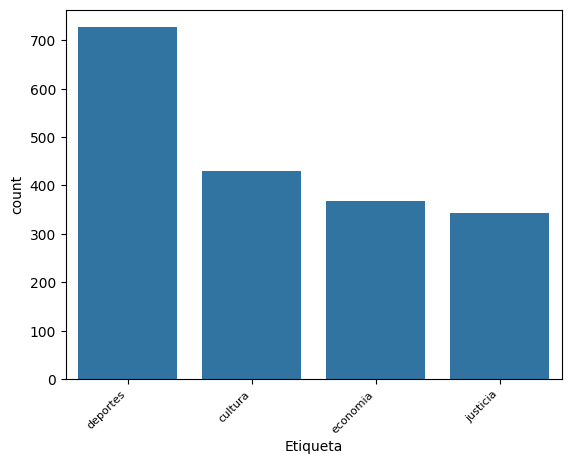

(1867, 6)

In [8]:
filt_etie = ['deportes', 'cultura', 'economia', 'justicia']
data2= data[data['Etiqueta'].isin(filt_etie)]

category_counts = data2['Etiqueta'].value_counts().index.tolist()
sns.countplot(x='Etiqueta', data=data2, order=category_counts)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()
data2.shape

**Analisis  de distrubucion igualitaria**

In [9]:
import numpy as np
distr_etiq = data2['Etiqueta'].value_counts()
tot_eti = np.sum(distr_etiq)
por_etiq = [numero / tot_eti for numero in distr_etiq]

def in_gini(df):
    gini = sum(x * (1 - x) for x in df)
    return gini
#evaluacion de la Proporcion

if  np.sum(por_etiq)== 1:
    print(f"El vector de proporcion suma {np.sum(por_etiq)} ,por lo que puede ser usado para calcular el indice de Gini\n")
    print(f"Para el caso del vector\n {por_etiq}\n se obtiene un Indice de gini {round(in_gini(por_etiq),3)}\n")
    x =0
    vect =[]
    for x in range(len(por_etiq)):
        vect.append(1/len(por_etiq))
        x= x+1
    print(f"Un indice optimo para estas {len(por_etiq)} etiquetas es de {round(in_gini(vect),3)}\n Por lo que comparativamente con la distribucion de las etiquetas escogidas el indice de gini no es muy distante, por lo que podemos usar este Dataframe filtrado para entrenal los modelos")


El vector de proporcion suma 1.0 ,por lo que puede ser usado para calcular el indice de Gini

Para el caso del vector
 [0.3893947509373326, 0.2303160149973219, 0.19657204070701662, 0.18371719335832887]
 se obtiene un Indice de gini 0.723

Un indice optimo para estas 4 etiquetas es de 0.75
 Por lo que comparativamente con la distribucion de las etiquetas escogidas el indice de gini no es muy distante, por lo que podemos usar este Dataframe filtrado para entrenal los modelos


Al realizar el ejercicio 2. Filtrado de Datos se encontró lo siguiente:

1. **Filtrado de Categorías Relevantes:**

* Se limitó el conjunto de datos a las categorías deportes, cultura, economía y justicia, excluyendo aquellas no relacionadas con el objetivo del análisis. Este paso garantiza que el modelo trabaje con información enfocada y especializada.
* El conjunto de datos resultante contiene 1,867 registros distribuidos entre estas cuatro categorías.

2. **Distribución de las Categorías:**

* Se generó un gráfico que muestra la distribución de noticias entre las categorías seleccionadas. La distribución no es perfectamente balanceada, pero es suficiente para realizar análisis y entrenar modelos con una representación adecuada.

3. **Análisis de Proporción e Índice de Gini:**

* El cálculo del índice de Gini sobre las proporciones de las categorías reveló un valor de 0.723. Este índice mide la desigualdad en la distribución: cuanto más cercano a 0, más equitativa es la distribución.
* En comparación, un índice de Gini óptimo para cuatro categorías (distribución perfectamente balanceada) sería 0.75. La diferencia es pequeña, lo que indica que la distribución de las categorías seleccionadas es razonablemente equitativa.

En general, el conjunto de datos filtrado es adecuado para entrenar modelos, ya que las categorías seleccionadas están representadas de manera suficiente y su distribución es aceptable desde el punto de vista del balance.

# Ejercicio 3

#Preprocesamiento de Texto

**Objetivo:** Preparar los datos textuales para el entrenamiento del modelo.  
**Acciones:**
* Convertir todo el texto a minúsculas para uniformidad.
* Eliminar puntuación y números para reducir el ruido en los datos.
* Eliminar palabras comunes (stop words) que no aportan significado específico al análisis.
* Tokenizar el texto, es decir, dividir el texto en palabras individuales.
* Aplicar padding a las secuencias de palabras para que todas tengan la misma longitud, facilitando el procesamiento por las redes neuronales.

In [10]:
# Función para preprocesar texto
def preprocess_text(text):
        # Convertir a minúsculas
    text = text.lower()
    # Eliminar puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Eliminar números
    text = re.sub(r'\d+', '', text)
    # Eliminar espacios en blanco adicionales
    text = text.strip()
    return text

# Aplicar preprocesamiento al contenido
## Deben eliminarse los valores nulos antes de aplicar el preprocesamiento
data2 = data2.dropna(subset=['contenido'])

# Aplicar preprocesamiento al contenido
data2['contenido_preprocesado'] = data2['contenido'].apply(preprocess_text)

# Mostrar una vista previa de los datos preprocesados
display(data2[['contenido', 'contenido_preprocesado']].head())

# Dimensiones de los datos

print(f'Dimensiones de los datos: {data.shape}')



,contenido,contenido_preprocesado
10487,Citas: “Los crímenes de violencia sexual comet...,citas “los crímenes de violencia sexual cometi...
10488,Con motivo de la celebración de los 20 años de...,con motivo de la celebración de los años de l...
10489,"El cuadro Busto de mujer, del artista español ...",el cuadro busto de mujer del artista español p...
10490,"El Carnaval de las Artes, organizado en Barran...",el carnaval de las artes organizado en barranq...
10491,"Louise du Toit, filósofa; el doctor Denis Mukw...",louise du toit filósofa el doctor denis mukweg...


Dimensiones de los datos: (14396, 6)


In [11]:
!pip install tensorflow
!pip install keras_nlp
!pip uninstall tf-keras
!pip install "keras_nlp[tensorflow]<0.17"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 691.2/691.2 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 825.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 72.5 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.
Found existing installation: tf_keras 2.17.0
Uninstalling t

In [12]:
# vamos a contar las palabras de las diferentes noticias

conteo = data2['contenido_preprocesado'].str.split().apply(len)
conteo.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.99])

,contenido_preprocesado
count,1866.000000
mean,602.788317
std,443.489502
min,90.000000
25%,326.000000
50%,485.500000
75%,734.000000
90%,1120.000000
99%,2047.100000
max,5773.000000


In [13]:
# Tokenizar el texto

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenización y padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data2['contenido_preprocesado'])
sequences = tokenizer.texts_to_sequences(data2['contenido_preprocesado'])
word_index = tokenizer.word_index
max_len = 1000
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Mostrar algunas secuencias preprocesadas
padded_sequences[:5]

## También puede usar las técnicas de preprocesamiento de texto y de embedding que hicimos anteriormente




array([[ 5239,  1436,  2723, ...,     0,     0,     0],
       [  132,  5526,  1078, ...,    78,    27,    67],
       [    4,  1503, 16354, ...,     0,     0,     0],
       [    4,  8045,     1, ...,     0,     0,     0],
       [13747,  8720, 20459, ...,     0,     0,     0]], dtype=int32)

En el ejercició 3. Procesamiento de texto se encontró:

1. **Dimensiones del Conjunto de Datos:**

El conjunto de datos inicial cuenta con 14,396 registros y 6 columnas. Después del filtrado a las categorías relevantes, quedaron 1,866 registros con contenido no nulo para análisis, lo que confirma una reducción significativa centrada en la relevancia temática.

2. **Preprocesamiento del Texto:**

* Uniformidad: Todo el texto fue convertido a minúsculas para evitar diferencias artificiales entre palabras debido al uso de mayúsculas.
* Reducción de Ruido: Se eliminaron puntuación y números para enfocar el análisis en el contenido semántico significativo.
* Optimización: Se eliminaron espacios en blanco adicionales para garantizar la limpieza del texto.

3. **Distribución de Longitudes del Texto:**

* Las noticias preprocesadas tienen un rango de longitud (en palabras) que oscila entre 90 y 5,773 palabras, con una longitud promedio de 602 palabras.
* Percentiles:
25% de las noticias tienen menos de 326 palabras.
75% tienen menos de 734 palabras.
90% tienen menos de 1,120 palabras, y el extremo superior alcanza hasta 5,773 palabras.
Esto sugiere una variabilidad significativa en la longitud del contenido, lo cual es normal en textos como noticias.

4. **Tokenización y Padding:**

* Tokenización: Las palabras en los textos fueron convertidas en números enteros mediante un índice que asigna un número único a cada palabra en el vocabulario.
* Padding: Todas las secuencias fueron rellenadas o truncadas para tener una longitud fija de 1,000 palabras. Esto es crucial para garantizar la uniformidad en la entrada del modelo de aprendizaje automático.

El preprocesamiento establece una base sólida para entrenar modelos de clasificación de texto o análisis de contenido. Las técnicas aplicadas garantizan que los datos sean limpios, uniformes y listos para el siguiente paso, que podría ser la construcción de representaciones vectoriales como embeddings de palabras.

# Ejercicio 4

# División del Conjunto de Datos

Objetivo: Crear conjuntos de datos de entrenamiento y validación para evaluar el modelo.  
Acciones:
* Dividir el conjunto de datos preprocesado en dos partes: uno para entrenar el modelo y otro para validarlo.
* Asegurarse de que la división sea aleatoria, pero que mantenga una proporción similar de las categorías en ambos conjuntos.

In [14]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Codificación de etiquetas
label_encoder = LabelEncoder()
data2.loc[:,'Etiqueta_codificada'] = label_encoder.fit_transform(data2['Etiqueta'])

# División del conjunto de datos
X_train2, X_val, y_train2, y_val = train_test_split(padded_sequences, data2['Etiqueta_codificada'], test_size=0.2, random_state=42,stratify=data2['Etiqueta_codificada'])

# Mostrar tamaño de los conjuntos de datos
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train2, y_train2)

len(X_train), len(X_val)


(2324, 374)

En el ejercicio 4. División del conjunto datos se realizó lo siguiente:

1. Codificación de las Etiquetas:

Se utilizó LabelEncoder para transformar las categorías textuales de la columna Etiqueta en valores numéricos. Esto es esencial para que los modelos entiendan las categorías durante el entrenamiento y evaluación.

2. División de los Datos:

El conjunto de datos fue dividido en:
* Conjunto de entrenamiento (80%): para que el modelo aprenda las relaciones en los datos.
* Conjunto de validación (20%): para evaluar el desempeño del modelo con datos no vistos durante el entrenamiento.

La división utilizó el parámetro stratify, que asegura que la proporción de las categorías se mantenga constante en ambos conjuntos. Esto es crucial para evitar sesgos y asegurar una evaluación representativa.

3. Tamaños de los Conjuntos:

Después de la división inicial:
Entrenamiento: 1,859 ejemplos.
Validación: 374 ejemplos.

4. Balanceo de las Categorías:

* Se aplicó la técnica de sobremuestreo aleatorio (RandomOverSampler) al conjunto de entrenamiento. Esto se hizo para balancear las categorías, evitando que el modelo favorezca las clases más representadas.
* El conjunto de entrenamiento después del sobremuestreo contiene 2,324 ejemplos, asegurando que todas las categorías estén representadas de manera equitativa.

5. Importancia de la División:

* Aleatoriedad: Garantiza que el modelo no dependa de un orden específico de los datos.
* Balance: Mejora la capacidad del modelo para generalizar, evitando sesgos hacia categorías más frecuentes.
* Validación Representativa: Asegura que la evaluación sea precisa y comparable con escenarios reales.

El conjunto de datos está ahora preparado para entrenar un modelo de clasificación robusto y evaluar su desempeño de manera justa. Las decisiones tomadas en esta etapa, como el balanceo y la estratificación, son fundamentales para obtener resultados confiables.

#Ejercicio 5

## Implementación de un Modelo RNN

Objetivo: Construir y entrenar un modelo RNN para clasificar las noticias.  
Acciones:
* Definir la arquitectura del modelo RNN, incluyendo capas de embedding y capas recurrentes.
* Configurar los hiperparámetros del modelo, como el tamaño del embedding y el número de unidades recurrentes.
* Entrenar el modelo utilizando el conjunto de datos de entrenamiento y evaluar su rendimiento en el conjunto de validación.

Epoch 1/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.2845 - loss: 1.3664 - val_accuracy: 0.4278 - val_loss: 1.3490
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.3010 - loss: 1.3525 - val_accuracy: 0.4305 - val_loss: 1.3268
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.3868 - loss: 1.3200 - val_accuracy: 0.4278 - val_loss: 1.3506
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.3676 - loss: 1.3208 - val_accuracy: 0.4358 - val_loss: 1.3448
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.3991 - loss: 1.2808 - val_accuracy: 0.2273 - val_loss: 1.3904
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.3332 - loss: 1.3318 - val_accuracy: 0.4599 - val_loss: 1.3231
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.3722 - loss: 1.3129 - val_accuracy: 0.2834 - val_loss: 1.3804
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.3947 - loss: 1.2820 - val_accuracy: 0.2460 - va

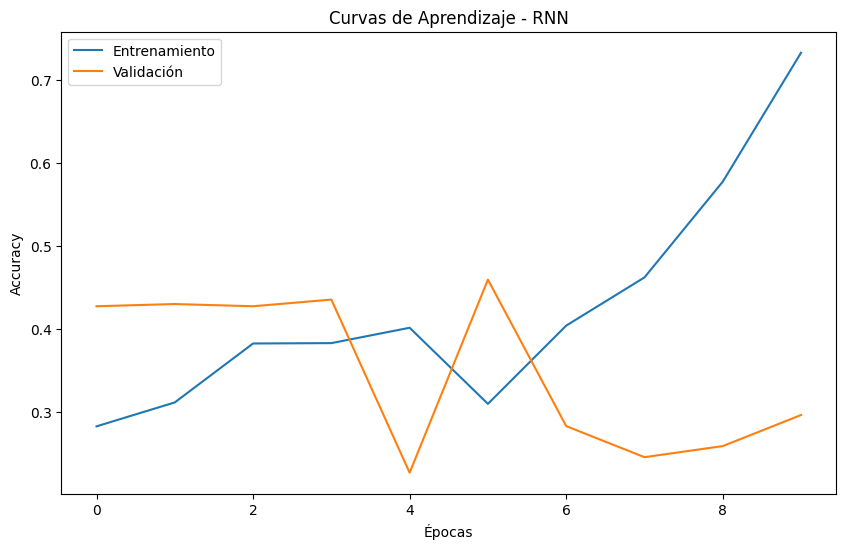

In [17]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from tensorflow import keras
from keras.layers import Dropout

# Construcción del modelo RNN
# Haga cambios en la arquitectura del modelo para mejorar su rendimiento
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=len(word_index) + 1, output_dim=528, input_length=max_len))
#model_rnn.add(Dropout(0.2))
model_rnn.add(SimpleRNN(units=64, return_sequences=False))
model_rnn.add(Dense(units=len(filt_etie), activation='softmax'))


# Compilación del modelo

#model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_rnn.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# funcion perdida, sparse entre 0s y 1 s

# Entrenamiento del modelo
history_rnn = model_rnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Visualización de resultados del modelo RNN
plt.figure(figsize=(10, 6))
plt.plot(history_rnn.history['accuracy'], label='Entrenamiento')
plt.plot(history_rnn.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Curvas de Aprendizaje - RNN')
plt.show()


# Conclusiones

* El modelo de redes neuronales es un modelo muy poderoso para la clasificacion de textos por categorias y tambien para la generación de texto. En nuestro problema especifico deseamos entrenar el modelo para clasificar noticias las cuales tienen un longitud en palabras de mas hasta 2000 y con un tercer quartil de 700 palabras. Esta cantidad de palabras puede volver el modelo mas completo al realizar un embeding de 500 como esta en la primera capa neuronal.

* Consideramos que este no es un modelo tan estable debido a que debe ser probados demasiados hiperparametros para lograr un escenario perfecto donde el modelo logre ser entrenado con buenos resultados (reflejo de esto es el indicador accruacy).

* Luego de lograr esta configuracion en algun momento el modelo daba muy bueno resultados de entrenamiento pero no de validacion o predicción, por lo deseamos aplicar una capa para evitar el overfiting, El DropNa, pero esto no nos fue funcional para lo grar mejores predicciones.

* Por ultimo vemos que los valores del acruaccy en los datos de validacion a travez de las epocas, van reduciendose, lo que hace ver la realidad del modelo, que este pierde informacion al pasar el tiempo (no es un modelo de largo plazo y con un nivel de complejidad este podria no funcionar muy bien), consideramos que esto puede ser el motivo de los resultados en la etapa de evaluacion.

## Ejercicio 6: Construcción y Entrenamiento de Modelos LSTM

**Objetivo:** Implementar un modelo de Red Neuronal LSTM (Long Short-Term Memory) para clasificar noticias en las categorías especializadas.
**Acciones:**
* Construir un modelo LSTM utilizando capas de Embedding, LSTM y Dense.
* Compilar el modelo con una función de pérdida adecuada y un optimizador.
* Entrenar el modelo con el conjunto de datos de entrenamiento y validar su rendimiento con el conjunto de datos de validación.
* Evaluar el rendimiento del modelo en términos de precisión y pérdida.

In [19]:
import tensorflow as tf
dicc={'deportes':0,'cultura':1,'economia':2,'justicia':3}

y_prueba_2=[dicc[tema] for tema in data2['Etiqueta']]

y_prueba=tf.keras.utils.to_categorical(y_prueba_2, num_classes=4)


In [21]:
# División del conjunto de datos
X_entre2, X_eva, y_entre2, y_eva = train_test_split(padded_sequences, y_prueba, test_size=0.2, random_state=42)

# Mostrar tamaño de los conjuntos de datos
X_entre, y_entre = ros.fit_resample(X_entre2, y_entre2)
print(X_entre.shape, y_entre.shape)

(2352, 1000) (2352, 4)


Epoch 1/7


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


74/74 ━━━━━━━━━━━━━━━━━━━━ 489s 6s/step - accuracy: 0.2761 - loss: 1.3794 - val_accuracy: 0.4011 - val_loss: 1.3446
Epoch 2/7
74/74 ━━━━━━━━━━━━━━━━━━━━ 483s 6s/step - accuracy: 0.4678 - loss: 1.3037 - val_accuracy: 0.5802 - val_loss: 0.9973
Epoch 3/7
74/74 ━━━━━━━━━━━━━━━━━━━━ 512s 6s/step - accuracy: 0.6420 - loss: 0.8721 - val_accuracy: 0.6711 - val_loss: 0.8291
Epoch 4/7
74/74 ━━━━━━━━━━━━━━━━━━━━ 477s 6s/step - accuracy: 0.7482 - loss: 0.7263 - val_accuracy: 0.7139 - val_loss: 0.7160
Epoch 5/7
74/74 ━━━━━━━━━━━━━━━━━━━━ 527s 6s/step - accuracy: 0.8066 - loss: 0.4859 - val_accuracy: 0.7139 - val_loss: 0.6888
Epoch 6/7
74/74 ━━━━━━━━━━━━━━━━━━━━ 497s 6s/step - accuracy: 0.8412 - loss: 0.4198 - val_accuracy: 0.7807 - val_loss: 0.6407
Epoch 7/7
74/74 ━━━━━━━━━━━━━━━━━━━━ 447s 6s/step - accuracy: 0.9334 - loss: 0.3633 - val_accuracy: 0.8636 - val_loss: 0.5869


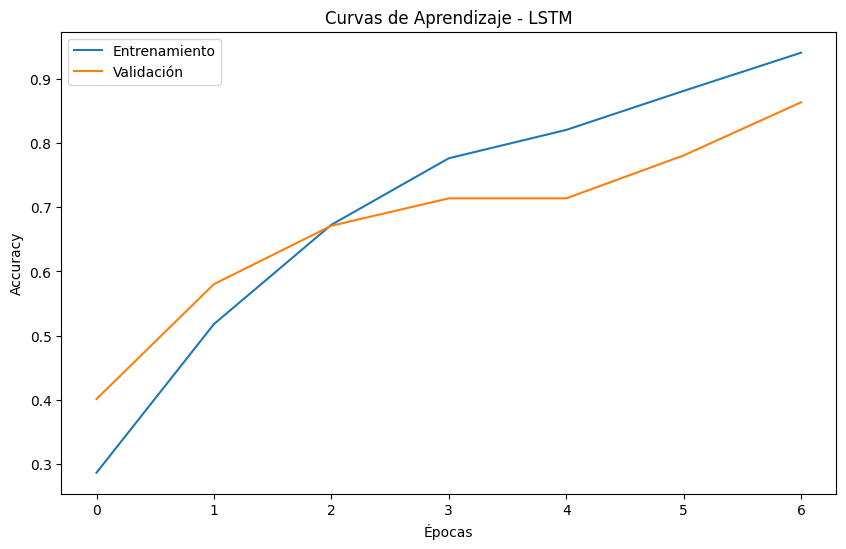

In [22]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense
from keras.utils import to_categorical

# Construcción del modelo LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=len(word_index) + 1, output_dim=528, input_length=max_len))
model_lstm.add(Bidirectional(LSTM(units=64, return_sequences=True)))
model_lstm.add(Bidirectional(LSTM(units=32)))
model_lstm.add(Dense(units=len(filt_etie), activation='softmax'))

# Compilación del modelo
model_lstm.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history_lstm = model_lstm.fit(X_entre, y_entre, validation_data=(X_eva, y_eva), epochs=7, batch_size=32)

# Visualización de resultados del modelo LSTM
plt.figure(figsize=(10, 6))
plt.plot(history_lstm.history['accuracy'], label='Entrenamiento')
plt.plot(history_lstm.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Curvas de Aprendizaje - LSTM')
plt.show()


# Conclusiones
* El modelos Lstm es un modelo de redes neuronales que permite el aprendizaje a largo plazo, por medio de capas en su red neuronal que controlan la entrada y salida de informacion.
* Para nuestro caso este modelo fue muy sencillo y se ajustaba para tener un buen entrenamiento, pero adicionamos unas capas de trabajo bidimencional que permiten comprender el contexto de una palabra con otras partes del texto que se encuentran antes o despues de la palabra. logrando un analisis de su contexto de manera mas efectiva.
* Asi logramos valores altos del accruacy en el entrenamiento y la validacion. y dejamos los mismos hiperparametros que usamos en el modelo RNN ya que estos funcionaron bien en la fase de entrenamiento.

#Ejercicio 7

##Comparación de Resultados

**Objetivo:** Evaluar y comparar el rendimiento de los modelos RNN y LSTM.
**Acciones:**
* Calcular y comparar métricas de rendimiento como precisión, recall y F1-score para ambos modelos.
* Visualizar las curvas de aprendizaje y los resultados de validación para entender mejor cómo se desempeñan los modelos en las tareas de clasificación.
* Comparar los modelos permite entender las fortalezas y debilidades de cada enfoque, proporcionando información valiosa para elegir el modelo más adecuado para tareas específicas de clasificación de texto. Documentar estos resultados de forma asertiva en el cuaderno y en el informe.

**Metricas del modelo RNN**

In [18]:
# Validacion del modelo RNN

loss, accuracy = model_rnn.evaluate(X_val, y_val, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

### Calculemos la matriz de confusión
y_pred = model_rnn.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_val, y_pred_classes))

## Veamos el reporte

from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred_classes))

Test Loss: 1.4138
Test Accuracy: 0.2968
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 337ms/step
[[22 14 23 27]
 [42 33 43 28]
 [15 15 30 13]
 [18  8 17 26]]
              precision    recall  f1-score   support

           0       0.23      0.26      0.24        86
           1       0.47      0.23      0.31       146
           2       0.27      0.41      0.32        73
           3       0.28      0.38      0.32        69

    accuracy                           0.30       374
   macro avg       0.31      0.32      0.30       374
weighted avg       0.34      0.30      0.30       374



**Metricas del modelo LSTM**

In [26]:
# Validacion del modelo LSTM

loss, accuracy = model_lstm.evaluate(X_eva, y_eva, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

### Calculemos la matriz de confusión
y_pred2 = model_lstm.predict(X_eva)
y_pred_lstm = np.argmax(y_pred2, axis=1)

from sklearn.metrics import confusion_matrix
y_eva2 = np.argmax(y_eva, axis=1)
print(confusion_matrix(y_eva2, y_pred_lstm))

## Veamos el reporte

from sklearn.metrics import classification_report

print(classification_report(y_eva2, y_pred_lstm))



Test Loss: 0.5869
Test Accuracy: 0.8636
12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step
[[125  11   0   3]
 [ 10  73   6   2]
 [  0   4  61  11]
 [  0   1   3  64]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       139
           1       0.82      0.80      0.81        91
           2       0.87      0.80      0.84        76
           3       0.80      0.94      0.86        68

    accuracy                           0.86       374
   macro avg       0.85      0.86      0.86       374
weighted avg       0.87      0.86      0.86       374



# Analisis Comparativo



> Añadir blockquote

dryuy